# 1. Data Collection and Initial Cleaning

## 1.1. Data Collection Explained

My primary intention is to create a hall-of-fame predictor for NBA players. In order to do so, I must collect career statistics and accolades for as many NBA players as possible. 

Reaching the basketball hall of fame is primarily dependent on three factors: 
1. College and non-NBA success 
2. NBA statistics and success
3. Coaching success

Fortunately, Kaggle provides open-source data with relevant information about NBA players since the league's inception in 1946. Here are the sources I will be using:
- Statistics: https://www.kaggle.com/drgilermo/nba-players-stats (until 2017)
- Other information: https://www.kaggle.com/open-source-sports/mens-professional-basketball (until 2012)

## 1.2. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Statistics
df_stats = pd.read_csv('./Data/Statistics/Seasons_Stats.csv',index_col=0)
df_finish = pd.read_csv('./Data/Statistics/player_data.csv')

In [3]:
# Other information
df_coach_awards = pd.read_csv('./Data/Other/basketball_awards_coaches.csv')
df_player_awards = pd.read_csv('./Data/Other/basketball_awards_players.csv')
df_coaches = pd.read_csv('./Data/Other/basketball_coaches.csv')
df_draft = pd.read_csv('./Data/Other/basketball_draft.csv')
df_hof = pd.read_csv('./Data/Other/basketball_hof.csv')
df_info = pd.read_csv('./Data/Other/basketball_master.csv')
df_all_star = pd.read_csv('./Data/Other/basketball_player_allstar.csv')
df_teams = pd.read_csv('./Data/Other/basketball_teams.csv')

We will address the statistics data frame first since its columns constitute the majority of critical factors. 

## 1.3. Dropping Blank Statistical Columns

In [4]:
df_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24691 entries, 0 to 24690
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    24624 non-null  float64
 1   Player  24624 non-null  object 
 2   Pos     24624 non-null  object 
 3   Age     24616 non-null  float64
 4   Tm      24624 non-null  object 
 5   G       24624 non-null  float64
 6   GS      18233 non-null  float64
 7   MP      24138 non-null  float64
 8   PER     24101 non-null  float64
 9   TS%     24538 non-null  float64
 10  3PAr    18839 non-null  float64
 11  FTr     24525 non-null  float64
 12  ORB%    20792 non-null  float64
 13  DRB%    20792 non-null  float64
 14  TRB%    21571 non-null  float64
 15  AST%    22555 non-null  float64
 16  STL%    20792 non-null  float64
 17  BLK%    20792 non-null  float64
 18  TOV%    19582 non-null  float64
 19  USG%    19640 non-null  float64
 20  blanl   0 non-null      float64
 21  OWS     24585 non-null  float64
 22

Note that the blanl and the blank2 columns are empty. We will go ahead and remove them. 

In [5]:
df_stats = df_stats.drop(['blanl','blank2'],axis=1)

## 1.4. Creating Career Statistics

In [6]:
df_stats.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [7]:
df_stats.tail()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0
24690,2017.0,Ivica Zubac,C,19.0,LAL,38.0,11.0,609.0,17.0,0.547,...,0.653,41.0,118.0,159.0,30.0,14.0,33.0,30.0,66.0,284.0


In order to match the time frame of both data sources, we must filter out all years after 2012 from df_stats. 

In [8]:
df_stats = df_stats[df_stats['Year']<=2012]

In [9]:
df_stats.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [10]:
df_stats.tail()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
21673,2012.0,Nick Young,SG,26.0,LAC,22.0,3.0,518.0,9.9,0.509,...,0.821,11.0,25.0,36.0,10.0,14.0,6.0,24.0,51.0,214.0
21674,2012.0,Sam Young,SF,26.0,TOT,35.0,2.0,375.0,9.7,0.412,...,0.731,20.0,42.0,62.0,15.0,17.0,6.0,16.0,23.0,114.0
21675,2012.0,Sam Young,SF,26.0,MEM,21.0,2.0,240.0,10.6,0.419,...,0.833,14.0,27.0,41.0,9.0,11.0,2.0,9.0,12.0,74.0
21676,2012.0,Sam Young,SF,26.0,PHI,14.0,0.0,135.0,8.2,0.399,...,0.643,6.0,15.0,21.0,6.0,6.0,4.0,7.0,11.0,40.0
21677,2012.0,Thaddeus Young,PF,23.0,PHI,63.0,1.0,1755.0,18.9,0.538,...,0.771,137.0,188.0,325.0,74.0,64.0,41.0,55.0,127.0,808.0


We should notice that the data frame lists statistics by year, but our goal is to gather career statistics. Hence, we must create a function that aggregates the statistics to career granularity. 

For the statistics that are countable, we will simply find the career sum. For the statistics that are not countable, we should use games played as a weight to find the career average. However, this task is complicated, so we will just find the unweighted career average. Some players might have seasons with low game counts that could skew their career averages, but that problem should not be too common. 

All of the data will be grouped by player name in the aggregate function. 

In [11]:
df_stats.columns

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS'],
      dtype='object')

In [12]:
countable_stat = [] # distinguishes between statistics that are countable and uncountable
filtered = df_stats.dropna()
for col in filtered.iloc[:,5:].columns:
    decimal = filtered[col].apply(lambda x:x-int(x))
    if (len(decimal)==len(decimal[decimal==0.0])):
        countable_stat.append(col)
    else:
        countable_stat.append(False)

In [13]:
countable_stats = list(filter(lambda x:x!=False,countable_stat))

In [14]:
uncountable_stats = []
for col in df_stats.iloc[:,5:].columns:
    if (col not in countable_stats):
        uncountable_stats.append(col)

In [15]:
stats = countable_stats+uncountable_stats
functions = []
for stat in stats:
    if (stat in countable_stats):
        functions.append(np.sum)
    else:
        functions.append(np.mean)
aggregate_functions = pd.DataFrame({'Stats':stats,'Functions':functions}).set_index('Stats').T.to_dict('list') # maps each column to the appropriate aggregate function

In [16]:
df_career_stats = df_stats.groupby('Player').agg(aggregate_functions)

In [17]:
df_career_stats.columns = ['_'.join(col) for col in df_career_stats.columns]

In [18]:
df_career_stats

,G_sum,GS_sum,MP_sum,FG_sum,FGA_sum,3P_sum,3PA_sum,2P_sum,2PA_sum,FT_sum,...,WS/48_mean,OBPM_mean,DBPM_mean,BPM_mean,VORP_mean,FG%_mean,3P%_mean,2P%_mean,eFG%_mean,FT%_mean
Player,,,,,,,,,,,,,,,,,,,,,
A.C. Green,1361.0,905.0,39044.0,4778.0,9686.0,125.0,509.0,4653.0,9177.0,3247.0,...,0.122111,-0.505556,0.422222,-0.083333,1.277778,0.487667,0.146833,0.501889,0.493167,0.708056
A.J. Bramlett,8.0,0.0,61.0,4.0,21.0,0.0,0.0,4.0,21.0,0.0,...,-0.129000,-10.500000,-6.300000,-16.800000,-0.200000,0.190000,NaN,0.190000,0.190000,NaN
A.J. English,151.0,18.0,3108.0,617.0,1418.0,9.0,65.0,608.0,1353.0,259.0,...,0.016500,-2.250000,-2.850000,-5.100000,-1.200000,0.436000,0.136500,0.450500,0.438500,0.774000
A.J. Guyton,80.0,14.0,1246.0,166.0,440.0,73.0,193.0,93.0,247.0,37.0,...,-0.141333,-6.066667,-4.933333,-11.000000,-0.333333,0.255667,0.255000,0.254000,0.310667,0.824000
A.J. Price,150.0,3.0,2228.0,318.0,848.0,127.0,411.0,191.0,437.0,142.0,...,0.049333,-0.366667,-2.000000,-2.366667,-0.100000,0.368333,0.305000,0.427667,0.442667,0.755667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zeljko Rebraca,239.0,24.0,3553.0,522.0,1003.0,0.0,0.0,522.0,1003.0,323.0,...,0.100429,-3.071429,-0.371429,-3.485714,-0.057143,0.505429,NaN,0.505429,0.505429,0.747286
Zelmo Beaty*,570.0,0.0,18348.0,3396.0,7237.0,0.0,0.0,3396.0,7237.0,2315.0,...,0.144250,-2.700000,0.400000,-2.300000,-0.100000,0.463500,NaN,0.463500,0.463500,0.751750
Zendon Hamilton,146.0,15.0,1609.0,183.0,414.0,0.0,0.0,183.0,414.0,245.0,...,0.051750,-6.012500,-2.912500,-8.950000,-0.162500,0.370125,NaN,0.370125,0.370125,0.679250


In [19]:
df_stats['Player'].nunique() # matches row dimension of df_career_stats, so the groupby function worked

3530

In [20]:
df_career_stats.columns

Index(['G_sum', 'GS_sum', 'MP_sum', 'FG_sum', 'FGA_sum', '3P_sum', '3PA_sum',
       '2P_sum', '2PA_sum', 'FT_sum', 'FTA_sum', 'ORB_sum', 'DRB_sum',
       'TRB_sum', 'AST_sum', 'STL_sum', 'BLK_sum', 'TOV_sum', 'PF_sum',
       'PTS_sum', 'PER_mean', 'TS%_mean', '3PAr_mean', 'FTr_mean', 'ORB%_mean',
       'DRB%_mean', 'TRB%_mean', 'AST%_mean', 'STL%_mean', 'BLK%_mean',
       'TOV%_mean', 'USG%_mean', 'OWS_mean', 'DWS_mean', 'WS_mean',
       'WS/48_mean', 'OBPM_mean', 'DBPM_mean', 'BPM_mean', 'VORP_mean',
       'FG%_mean', '3P%_mean', '2P%_mean', 'eFG%_mean', 'FT%_mean'],
      dtype='object')

OWS, DWS, WS, and VORP should be sum statistics instead of mean statistics since they are cumulative. We can fix this issue by multiplying each player's statistics by the number of player occurrences in df_stats. 

In [21]:
OWS_sum = []
DWS_sum = []
WS_sum = []
VORP_sum = []
for player,row in df_career_stats.iterrows():
    occurrences = len(df_stats[df_stats['Player']==player])
    OWS_sum.append(row['OWS_mean']*occurrences)
    DWS_sum.append(row['DWS_mean']*occurrences)
    WS_sum.append(row['WS_mean']*occurrences)
    VORP_sum.append(row['VORP_mean']*occurrences)

In [22]:
df_career_stats['OWS_sum'] = OWS_sum
df_career_stats['DWS_sum'] = DWS_sum
df_career_stats['WS_sum'] = WS_sum
df_career_stats['VORP_sum'] = VORP_sum

In [23]:
df_career_stats = df_career_stats.drop(['OWS_mean','DWS_mean','WS_mean','VORP_mean'],axis=1)

In [24]:
df_career_stats

,G_sum,GS_sum,MP_sum,FG_sum,FGA_sum,3P_sum,3PA_sum,2P_sum,2PA_sum,FT_sum,...,BPM_mean,FG%_mean,3P%_mean,2P%_mean,eFG%_mean,FT%_mean,OWS_sum,DWS_sum,WS_sum,VORP_sum
Player,,,,,,,,,,,,,,,,,,,,,
A.C. Green,1361.0,905.0,39044.0,4778.0,9686.0,125.0,509.0,4653.0,9177.0,3247.0,...,-0.083333,0.487667,0.146833,0.501889,0.493167,0.708056,60.7,43.5,104.2,23.0
A.J. Bramlett,8.0,0.0,61.0,4.0,21.0,0.0,0.0,4.0,21.0,0.0,...,-16.800000,0.190000,NaN,0.190000,0.190000,NaN,-0.2,0.1,-0.2,-0.2
A.J. English,151.0,18.0,3108.0,617.0,1418.0,9.0,65.0,608.0,1353.0,259.0,...,-5.100000,0.436000,0.136500,0.450500,0.438500,0.774000,-0.4,1.4,1.1,-2.4
A.J. Guyton,80.0,14.0,1246.0,166.0,440.0,73.0,193.0,93.0,247.0,37.0,...,-11.000000,0.255667,0.255000,0.254000,0.310667,0.824000,0.3,-0.1,0.3,-1.0
A.J. Price,150.0,3.0,2228.0,318.0,848.0,127.0,411.0,191.0,437.0,142.0,...,-2.366667,0.368333,0.305000,0.427667,0.442667,0.755667,0.2,2.0,2.2,-0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zeljko Rebraca,239.0,24.0,3553.0,522.0,1003.0,0.0,0.0,522.0,1003.0,323.0,...,-3.485714,0.505429,NaN,0.505429,0.505429,0.747286,3.9,4.8,8.7,-0.4
Zelmo Beaty*,570.0,0.0,18348.0,3396.0,7237.0,0.0,0.0,3396.0,7237.0,2315.0,...,-2.300000,0.463500,NaN,0.463500,0.463500,0.751750,36.9,21.3,58.1,-0.8
Zendon Hamilton,146.0,15.0,1609.0,183.0,414.0,0.0,0.0,183.0,414.0,245.0,...,-8.950000,0.370125,NaN,0.370125,0.370125,0.679250,1.4,1.5,3.2,-1.3


We now have a data frame, df_career_stats, that provides career statistics for all NBA players. 

## 1.5. Gauging Statistical Nulls

In [25]:
df_career_stats.head()

,G_sum,GS_sum,MP_sum,FG_sum,FGA_sum,3P_sum,3PA_sum,2P_sum,2PA_sum,FT_sum,...,BPM_mean,FG%_mean,3P%_mean,2P%_mean,eFG%_mean,FT%_mean,OWS_sum,DWS_sum,WS_sum,VORP_sum
Player,,,,,,,,,,,,,,,,,,,,,
A.C. Green,1361.0,905.0,39044.0,4778.0,9686.0,125.0,509.0,4653.0,9177.0,3247.0,...,-0.083333,0.487667,0.146833,0.501889,0.493167,0.708056,60.7,43.5,104.2,23.0
A.J. Bramlett,8.0,0.0,61.0,4.0,21.0,0.0,0.0,4.0,21.0,0.0,...,-16.800000,0.190000,NaN,0.190000,0.190000,NaN,-0.2,0.1,-0.2,-0.2
A.J. English,151.0,18.0,3108.0,617.0,1418.0,9.0,65.0,608.0,1353.0,259.0,...,-5.100000,0.436000,0.136500,0.450500,0.438500,0.774000,-0.4,1.4,1.1,-2.4
A.J. Guyton,80.0,14.0,1246.0,166.0,440.0,73.0,193.0,93.0,247.0,37.0,...,-11.000000,0.255667,0.255000,0.254000,0.310667,0.824000,0.3,-0.1,0.3,-1.0
A.J. Price,150.0,3.0,2228.0,318.0,848.0,127.0,411.0,191.0,437.0,142.0,...,-2.366667,0.368333,0.305000,0.427667,0.442667,0.755667,0.2,2.0,2.2,-0.3


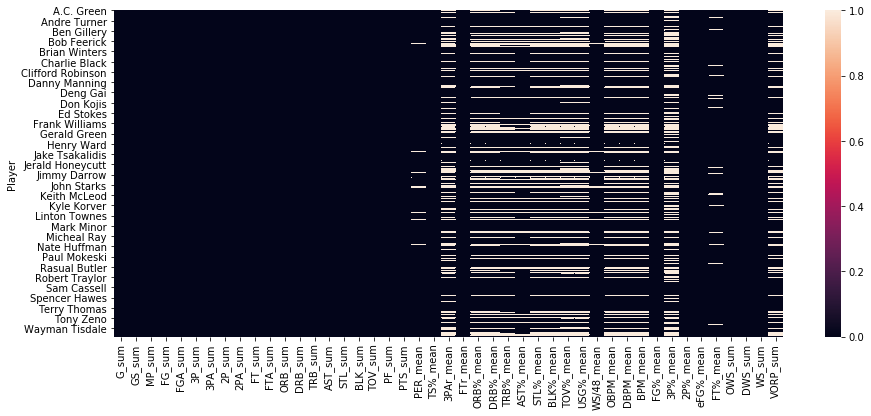

In [26]:
plt.figure(figsize=(15,6))
sns.heatmap(df_career_stats.isnull())

In [27]:
df_career_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3530 entries, A.C. Green to Zydrunas Ilgauskas
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   G_sum       3530 non-null   float64
 1   GS_sum      3530 non-null   float64
 2   MP_sum      3530 non-null   float64
 3   FG_sum      3530 non-null   float64
 4   FGA_sum     3530 non-null   float64
 5   3P_sum      3530 non-null   float64
 6   3PA_sum     3530 non-null   float64
 7   2P_sum      3530 non-null   float64
 8   2PA_sum     3530 non-null   float64
 9   FT_sum      3530 non-null   float64
 10  FTA_sum     3530 non-null   float64
 11  ORB_sum     3530 non-null   float64
 12  DRB_sum     3530 non-null   float64
 13  TRB_sum     3530 non-null   float64
 14  AST_sum     3530 non-null   float64
 15  STL_sum     3530 non-null   float64
 16  BLK_sum     3530 non-null   float64
 17  TOV_sum     3530 non-null   float64
 18  PF_sum      3530 non-null   float64
 19  PTS_sum  

It is apparent that many of the statistics, particularly the advanced ones, have hundreds of null values. The main reason for this sparsity is that the NBA has not always measured all of the current statistics. For example, 3PT field goals were not instituted/recorded until the 1979-1980 season. 

If we want to incorporate a wide variety of statistics into our prediction models, the null statistical values must be dropped since there is no way to impute modern statistics based on older statistics. However, this decision would exclude many of the pre-modern NBA players from our training data.  

Although our model is supposed to predict the future, which strongly resembles the modern NBA, we have no choice but to train the model on pre-modern NBA players. Most hall-of-fame players did not play in the modern era, so we will have to accommodate their lapse in statistics in order to optimize model performance. 

In [28]:
# Players with null statistical values
df_career_stats[df_career_stats.isnull().any(axis=1)]

,G_sum,GS_sum,MP_sum,FG_sum,FGA_sum,3P_sum,3PA_sum,2P_sum,2PA_sum,FT_sum,...,BPM_mean,FG%_mean,3P%_mean,2P%_mean,eFG%_mean,FT%_mean,OWS_sum,DWS_sum,WS_sum,VORP_sum
Player,,,,,,,,,,,,,,,,,,,,,
A.J. Bramlett,8.0,0.0,61.0,4.0,21.0,0.0,0.0,4.0,21.0,0.0,...,-16.800000,0.190000,NaN,0.190000,0.190000,NaN,-0.2,0.1,-0.2,-0.2
A.W. Holt,6.0,0.0,14.0,1.0,8.0,0.0,0.0,1.0,8.0,2.0,...,NaN,0.125000,NaN,0.125000,0.125000,0.667000,-0.1,0.0,-0.1,NaN
Aaron James,356.0,0.0,7671.0,1609.0,3347.0,0.0,0.0,1609.0,3347.0,611.0,...,-3.080000,0.479800,NaN,0.479800,0.479800,0.760800,7.8,5.3,13.2,-1.7
Aaron Miles,19.0,0.0,118.0,6.0,18.0,0.0,0.0,6.0,18.0,4.0,...,-8.200000,0.333000,NaN,0.333000,0.333000,1.000000,-0.2,0.1,0.0,-0.2
Aaron Swinson,9.0,0.0,51.0,10.0,18.0,0.0,0.0,10.0,18.0,4.0,...,-5.800000,0.556000,NaN,0.556000,0.556000,0.800000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zeke Sinicola,12.0,0.0,48.0,5.0,20.0,0.0,0.0,5.0,20.0,3.0,...,NaN,0.250000,NaN,0.250000,0.250000,0.250000,-0.3,0.0,-0.2,NaN
Zeke Zawoluk,179.0,0.0,3534.0,396.0,1065.0,0.0,0.0,396.0,1065.0,418.0,...,NaN,0.370333,NaN,0.370333,0.370333,0.750667,4.9,3.2,8.1,NaN
Zeljko Rebraca,239.0,24.0,3553.0,522.0,1003.0,0.0,0.0,522.0,1003.0,323.0,...,-3.485714,0.505429,NaN,0.505429,0.505429,0.747286,3.9,4.8,8.7,-0.4


In [29]:
df_career_stats

,G_sum,GS_sum,MP_sum,FG_sum,FGA_sum,3P_sum,3PA_sum,2P_sum,2PA_sum,FT_sum,...,BPM_mean,FG%_mean,3P%_mean,2P%_mean,eFG%_mean,FT%_mean,OWS_sum,DWS_sum,WS_sum,VORP_sum
Player,,,,,,,,,,,,,,,,,,,,,
A.C. Green,1361.0,905.0,39044.0,4778.0,9686.0,125.0,509.0,4653.0,9177.0,3247.0,...,-0.083333,0.487667,0.146833,0.501889,0.493167,0.708056,60.7,43.5,104.2,23.0
A.J. Bramlett,8.0,0.0,61.0,4.0,21.0,0.0,0.0,4.0,21.0,0.0,...,-16.800000,0.190000,NaN,0.190000,0.190000,NaN,-0.2,0.1,-0.2,-0.2
A.J. English,151.0,18.0,3108.0,617.0,1418.0,9.0,65.0,608.0,1353.0,259.0,...,-5.100000,0.436000,0.136500,0.450500,0.438500,0.774000,-0.4,1.4,1.1,-2.4
A.J. Guyton,80.0,14.0,1246.0,166.0,440.0,73.0,193.0,93.0,247.0,37.0,...,-11.000000,0.255667,0.255000,0.254000,0.310667,0.824000,0.3,-0.1,0.3,-1.0
A.J. Price,150.0,3.0,2228.0,318.0,848.0,127.0,411.0,191.0,437.0,142.0,...,-2.366667,0.368333,0.305000,0.427667,0.442667,0.755667,0.2,2.0,2.2,-0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zeljko Rebraca,239.0,24.0,3553.0,522.0,1003.0,0.0,0.0,522.0,1003.0,323.0,...,-3.485714,0.505429,NaN,0.505429,0.505429,0.747286,3.9,4.8,8.7,-0.4
Zelmo Beaty*,570.0,0.0,18348.0,3396.0,7237.0,0.0,0.0,3396.0,7237.0,2315.0,...,-2.300000,0.463500,NaN,0.463500,0.463500,0.751750,36.9,21.3,58.1,-0.8
Zendon Hamilton,146.0,15.0,1609.0,183.0,414.0,0.0,0.0,183.0,414.0,245.0,...,-8.950000,0.370125,NaN,0.370125,0.370125,0.679250,1.4,1.5,3.2,-1.3


## 1.6. Saving Aggregated Statistical Data Frame

In [30]:
df_career_stats.to_csv('./Data/career_stats.csv')

## 1.7. Further Steps

Our next priority is to merge the career statistics data frame with the data frames categorized under "other information." Null values should not be an issue with most of those data frames because they are purely lists of information. The challenge will be joining the data frames on name - both data sources might not use the same naming conventions, so will probably have to make adjustments. 

Before we create our final merged data frame, we should do feature engineering to remove any uncesssary information from each subsidiary data frame. This objective will be completed in the next section. Ideally, all of the features that we will consider in exploratory data analysis will offer useful information. 